# Term Project

### Add your name(s) and EIDs below
- Student Name: Oliver Tan
- Student UT EID: ot2825
- Partner Name:
- Partner UT EID:

In [141]:
# Standard Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
import scipy

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [142]:
print("This data set contains information on 137 different countries. Each row has information on how happy the country is, as well as other metrics such as life expectancy, GDP per capita, accessibility of social support, etc.")
print("I wish to learn about how various factors affect how happy the residents of a country are. Can we predict how happy a country is if we are given information on these different factors?")
print("This problem is a multiple linear regression problem. My research question is: How well can we predict the happiness score of a country given the country's social support score, GDP per capita, life expectancy, freedom score, generosity, and perceptions of corruption?")
print("I am currently expecting a moderate correlation (my guess: .3 to .7?) between most of these factors. I currently don't expect a very strong correlation, because there are so many factors that can affect how happy a country is.")
print("However, I don't expect no correlation, because certainly these factors affect the happiness somewhat - for example, I doubt that social support has no impact on happiness. ")
print("I also currently expect the model to predict the happiness score moderately well (my guess: R^2 from .3 to .7?) - again, I don't think these 6 factors can predict a country's happiness extremely precisely, but I think it can predict it generally well.")
print("I think I will evaluate my project and the accuracy of the model based on the pearson coerrelation coefficients, and the R^2 score of the model. My current guess is that the R^2 score will be somewhere from .3 to .7, doing moderately well.")

This data set contains information on 137 different countries. Each row has information on how happy the country is, as well as other metrics such as life expectancy, GDP per capita, accessibility of social support, etc.
I wish to learn about how various factors affect how happy the residents of a country are. Can we predict how happy a country is if we are given information on these different factors?
This problem is a multiple linear regression problem. My research question is: How well can we predict the happiness score of a country given the country's social support score, GDP per capita, life expectancy, freedom score, generosity, and perceptions of corruption?
I am currently expecting a moderate correlation (my guess: .3 to .7?) between most of these factors. I currently don't expect a very strong correlation, because there are so many factors that can affect how happy a country is.
However, I don't expect no correlation, because certainly these factors affect the happiness somew

<!-- BEGIN QUESTION -->



# Setup

In [143]:
#https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023
#Ladder score = happiness score

df = pd.read_csv("WHR2023.csv")
field = "Ladder score"
fac1 = "Social support"
fac2 = "Logged GDP per capita"
fac3 = "Healthy life expectancy"
fac4 = "Freedom to make life choices"
fac5 = "Generosity"
fac6 = "Perceptions of corruption"
f = [fac1, fac2, fac3, fac4, fac5, fac6]

In [144]:
sample = df[f + [field]].dropna()

y = sample[field]
x = []

for i in f:
    x.append(sample[i])
#x1 = sample[fac1]
#x2 = sample[fac2]
#x3 = sample[fac3]
#x4 = sample[fac4]
#x5 = sample[fac5]
#x6 = sample[fac6]

<!-- BEGIN QUESTION -->



<!-- BEGIN QUESTION -->



# Graphs

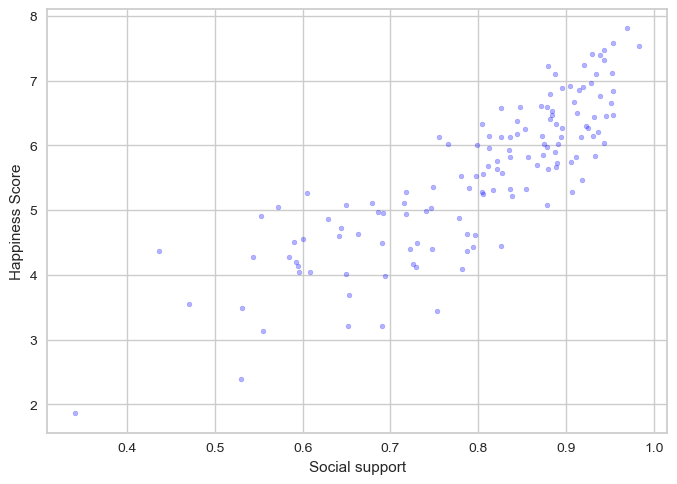

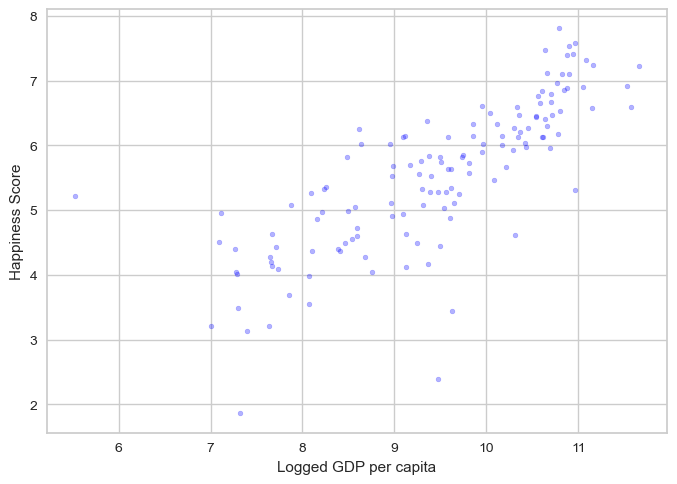

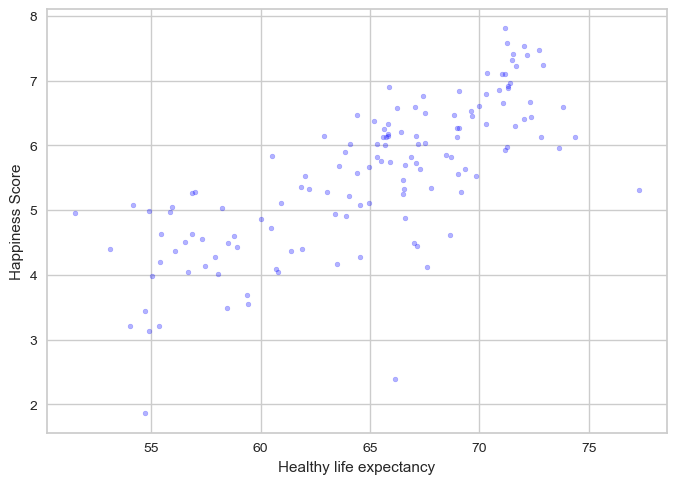

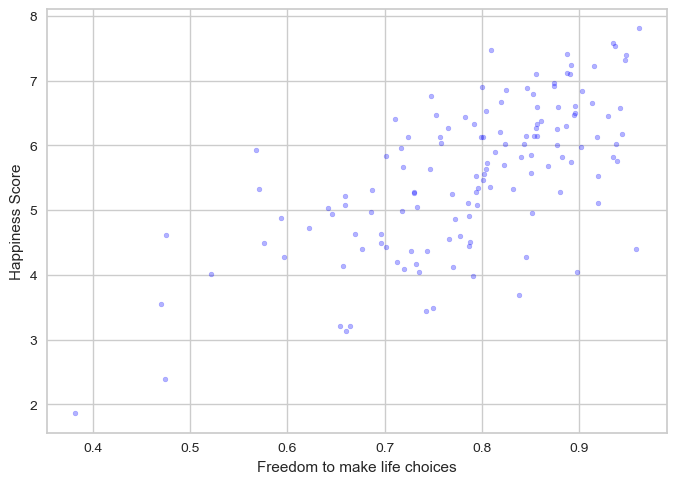

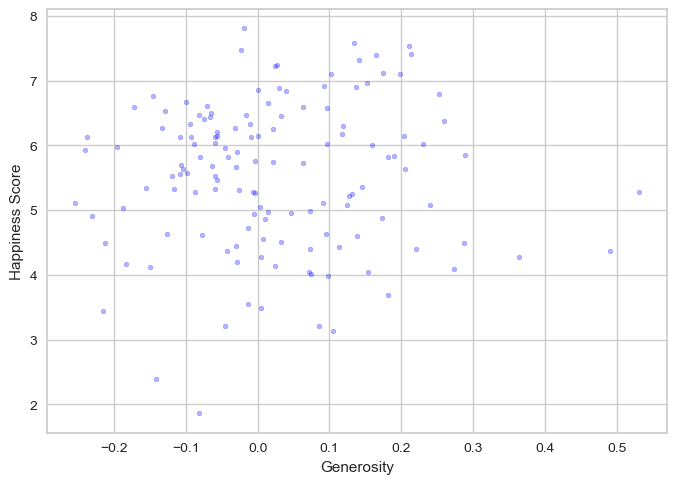

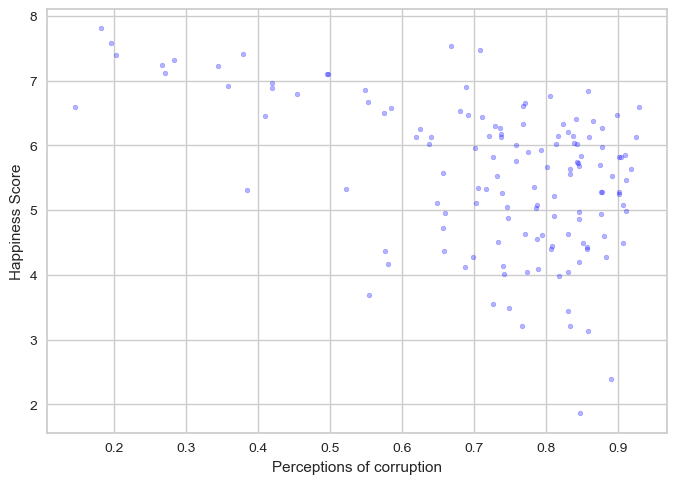

In [145]:
for i in range(len(f)):
    fig = plt.figure()
    plt.scatter(x[i], y, c="blue", alpha =0.3 , marker =".")
    plt.xlabel(f[i])
    plt.ylabel("Happiness Score")
    plt.show()

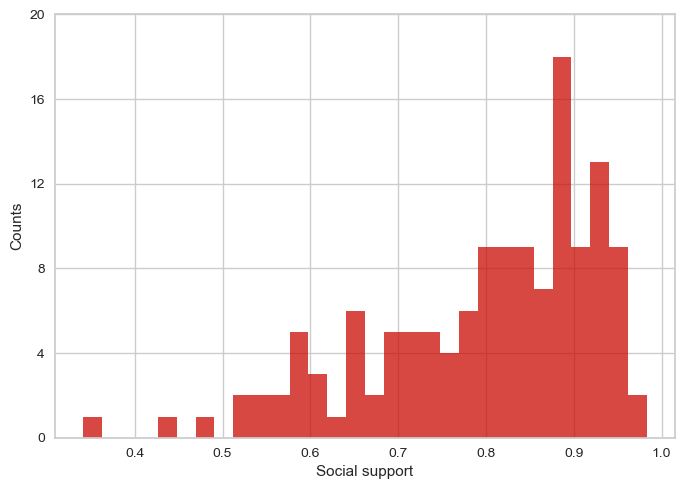

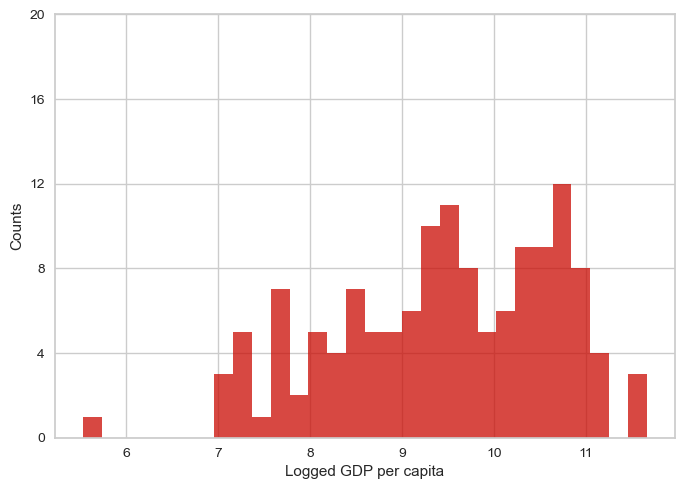

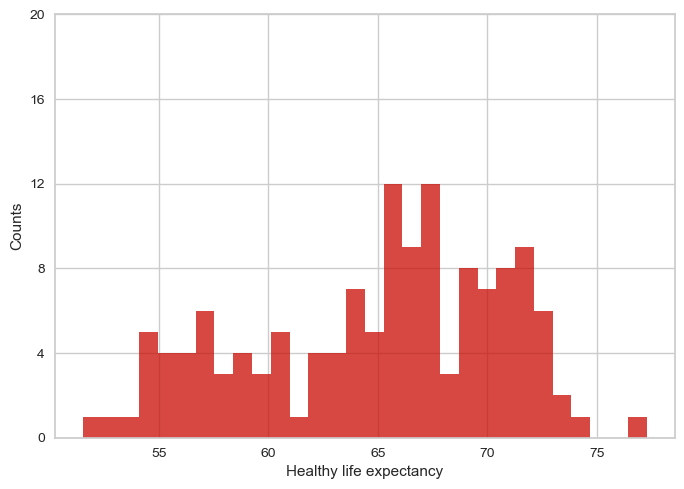

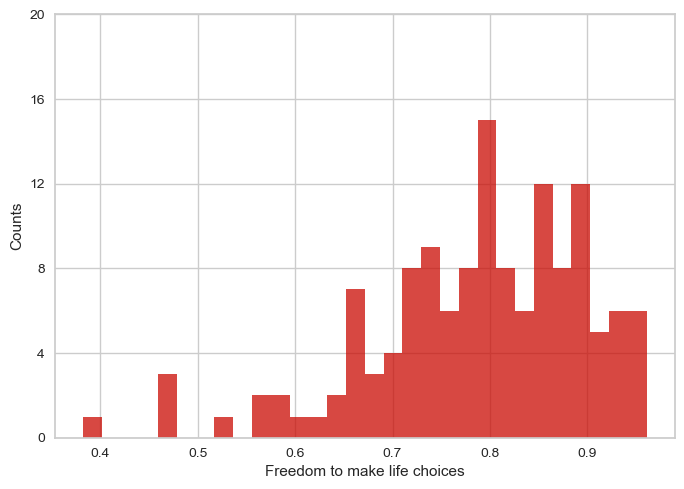

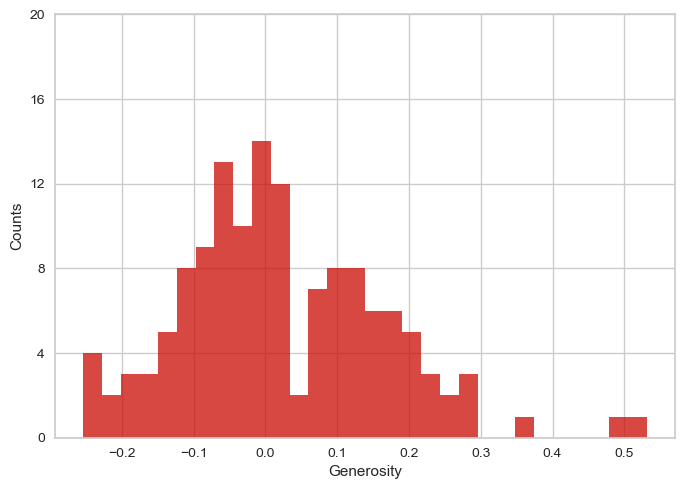

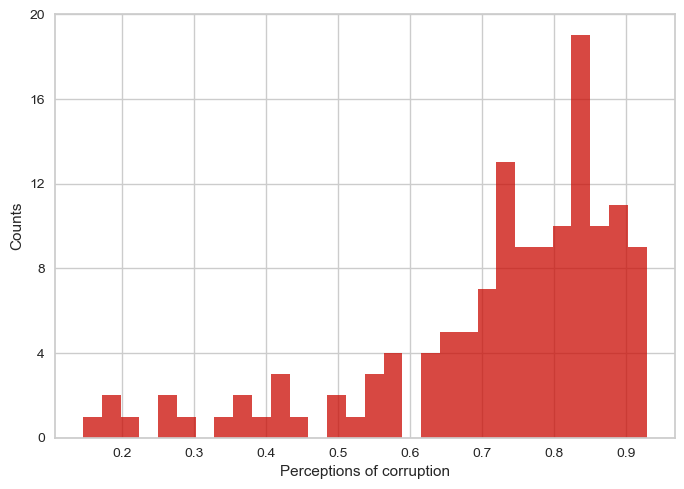

In [146]:
for i in range(len(f)):
    fig = plt.figure()
    plt.hist(x[i], 30, density=False, facecolor='r', alpha=0.75)
    plt.xlabel(f[i])
    plt.ylabel("Counts")
    plt.yticks(np.arange(0,24,4))

<!-- BEGIN QUESTION -->



<!-- BEGIN QUESTION -->



<!-- BEGIN QUESTION -->



# Correlations

In [147]:
for i in range(len(f)):
    corr = scipy.stats.pearsonr(x[i], y)
    print(f"The correlation between {f[i]} and {field} is", corr.statistic)

The correlation between Social support and Ladder score is 0.8380564529399169
The correlation between Logged GDP per capita and Ladder score is 0.7838362945668083
The correlation between Healthy life expectancy and Ladder score is 0.7469281602944294
The correlation between Freedom to make life choices and Ladder score is 0.661959580440463
The correlation between Generosity and Ladder score is 0.039828605197425926
The correlation between Perceptions of corruption and Ladder score is -0.47056085060863023


In [148]:
print("Social support, GDP, life expectancy, and freedom all have a moderate to strong positive correlation with happiness. In general, when any of these factors are higher (ex. GDP is higher), that is a possible indication that the happiness may be higher. This all makes sense to me.")
print("Generosity has no strong correlation with happiness, meaning higher generosity cannot be said to be associated with higher happiness. Perceptions of corruption has a moderate negative correlation with happiness, meaning that in general, higher perceptions of corruption are associated with less happiness.")

Social support, GDP, life expectancy, and freedom all have a moderate to strong positive correlation with happiness. In general, when any of these factors are higher (ex. GDP is higher), that is a possible indication that the happiness may be higher. This all makes sense to me.
Generosity has no strong correlation with happiness, meaning higher generosity cannot be said to be associated with higher happiness. Perceptions of corruption has a moderate negative correlation with happiness, meaning that in general, higher perceptions of corruption are associated with less happiness.


<!-- BEGIN QUESTION -->



# Individual-factor modeling

In [149]:
for i in range(len(x)):
    ind = LinearRegression().fit(np.vstack(x[i]), y)
    print(f"Modeling using {f[i]}")
    print(f"Coefficient of model: {ind.coef_[0]}")
    print(f"Intercept of model: {ind.intercept_}")
    print(f"Model's R-squared score: {ind.score(np.vstack(x[i]), y)}")
    print()

Modeling using Social support
Coefficient of model: 7.390356672003915
Intercept of model: -0.35773676156642154
Model's R-squared score: 0.7023386183142354

Modeling using Logged GDP per capita
Coefficient of model: 0.7402652490678236
Intercept of model: -1.4549082747633006
Model's R-squared score: 0.6143993366802244

Modeling using Healthy life expectancy
Coefficient of model: 0.14844553582129913
Intercept of model: -4.099713819202934
Model's R-squared score: 0.557901676640821

Modeling using Freedom to make life choices
Coefficient of model: 6.72471200567663
Intercept of model: 0.24482420546753314
Model's R-squared score: 0.4381904861369138

Modeling using Generosity
Coefficient of model: 0.32144493378946065
Intercept of model: 5.536865948435329
Model's R-squared score: 0.0015863177919726024

Modeling using Perceptions of corruption
Coefficient of model: -3.0322383482450714
Intercept of model: 7.741565410216635
Model's R-squared score: 0.22142751412551764



In [150]:
print("The R-squared scores range from 0.00159, for the generosity model, to 0.702, for the social support model. This implies that these 6 models range from being unable to explain the happiness score to explaining the happiness score moderately well.")

The R-squared scores range from 0.00159, for the generosity model, to 0.702, for the social support model. This implies that these 6 models range from being unable to explain the happiness score to explaining the happiness score moderately well.


<!-- BEGIN QUESTION -->



# Modeling with all 6 factors

In [151]:
my_X = np.vstack(tuple(x)).T
reg = LinearRegression().fit(my_X, y)

In [152]:
print("Modeling using all six factors")
print(f"Coefficients of model: {reg.coef_}")
print(f"Intercept of model: {reg.intercept_}")

Modeling using all six factors
Coefficients of model: [ 3.92301198  0.20260928  0.02011112  2.34000679  0.14288681 -0.79789998]
Intercept of model: -2.0802172030775985


In [153]:
print(f"Model's R-squared score: {reg.score(my_X, y)}")

Model's R-squared score: 0.8280138686090923


In [154]:
print("This model, which uses all 6 factors, has an R-squared score of 0.828, meaning 82.8% of the variation in happiness can be explained by these 6 factors. This model does a decent, but not perfect, job of predicting the happiness level of a country. I would consider this model a good fit.")

This model, which uses all 6 factors, has an R-squared score of 0.828, meaning 82.8% of the variation in happiness can be explained by these 6 factors. This model does a decent, but not perfect, job of predicting the happiness level of a country. I would consider this model a good fit.


<!-- BEGIN QUESTION -->



<!-- BEGIN QUESTION -->



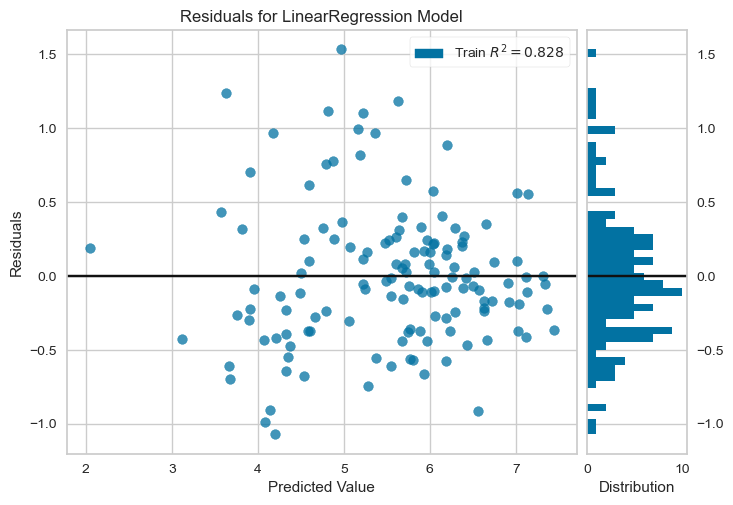

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [155]:
visualizer = ResidualsPlot(reg)
visualizer.fit(my_X, y)
visualizer.show()

# Is multicollinearity at play?

In [156]:
print("Correlations between:")
for i in range(len(f)):
    for j in range(i+1, len(f)):
        if(i == j):
            continue
        corr = scipy.stats.pearsonr(x[i], x[j])
        print(f"{f[i]} and {f[j]}: {corr.statistic}")
    print()

Correlations between:
Social support and Logged GDP per capita: 0.7417623284328156
Social support and Healthy life expectancy: 0.7255238344750959
Social support and Freedom to make life choices: 0.5463186697137131
Social support and Generosity: 0.040528007158890045
Social support and Perceptions of corruption: -0.27525486619723355

Logged GDP per capita and Healthy life expectancy: 0.8375330839314412
Logged GDP per capita and Freedom to make life choices: 0.449462335985112
Logged GDP per capita and Generosity: -0.16229841250253174
Logged GDP per capita and Perceptions of corruption: -0.4353725940306824

Healthy life expectancy and Freedom to make life choices: 0.41509201274582197
Healthy life expectancy and Generosity: -0.13503598798873317
Healthy life expectancy and Perceptions of corruption: -0.4043964680171801

Freedom to make life choices and Generosity: 0.1646663937518118
Freedom to make life choices and Perceptions of corruption: -0.3814666782728306

Generosity and Perceptions of

# Removing one variable

In [157]:
xn = []
xn.append(sample[fac1]) #Social support
xn.append(sample[fac2])
#xn.append(sample[fac3]) #"Healthy life expectancy"
xn.append(sample[fac4])
xn.append(sample[fac5])
xn.append(sample[fac6])
my_X_rm = np.vstack(tuple(xn)).T
reg2 = LinearRegression().fit(my_X_rm, y)

In [158]:
print(f"Modeling without {fac3}:")
print(f"Coefficients of model: {reg2.coef_}")
print(f"Intercept of model: {reg2.intercept_}")
print(f"Model's R-squared score: {reg2.score(my_X_rm, y)}")

Modeling without Healthy life expectancy:
Coefficients of model: [ 4.16683921  0.26015395  2.3111681   0.09902046 -0.8527313 ]
Intercept of model: -1.4489786632967103
Model's R-squared score: 0.8252712539219393


# Modeling with a Ridge

<!-- BEGIN QUESTION -->



In [159]:
X_train, X_test, y_train, y_test = train_test_split(my_X, y, test_size=0.2, random_state=123)
rdg = Ridge()
rdg.fit(X_train, y_train)

Ridge()

In [160]:
print("Modeling with a ridge")
print(f"Model's R-squared score: {rdg.score(X_test, y_test)}")
print(f"Coefficients of model: {rdg.coef_}")
print(f"Intercept of model: {rdg.intercept_}")

Modeling with a ridge
Model's R-squared score: 0.8489800938819622
Coefficients of model: [ 1.86276788  0.29284322  0.04123587  1.61413917  0.53169095 -0.71024143]
Intercept of model: -2.151462932594656


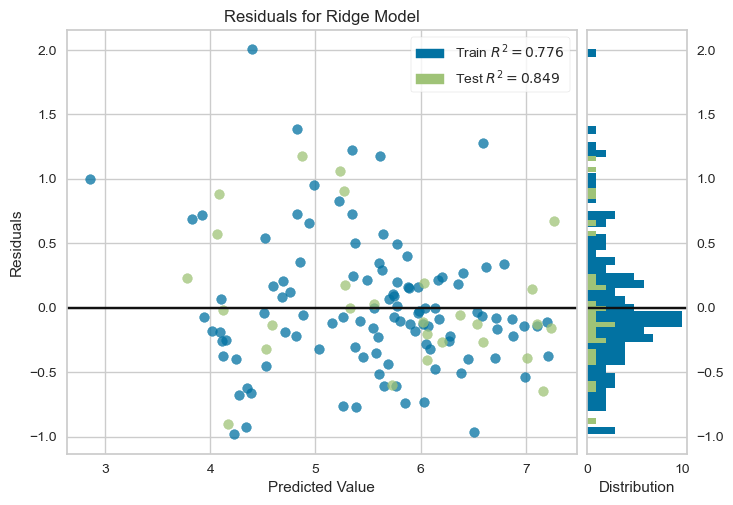

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [161]:
visualizer3 = ResidualsPlot(rdg)
visualizer3.fit(X_train, y_train)
visualizer3.score(X_test, y_test)
visualizer3.show()

<!-- BEGIN QUESTION -->



<!-- BEGIN QUESTION -->

